In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## MAP 2D TEST

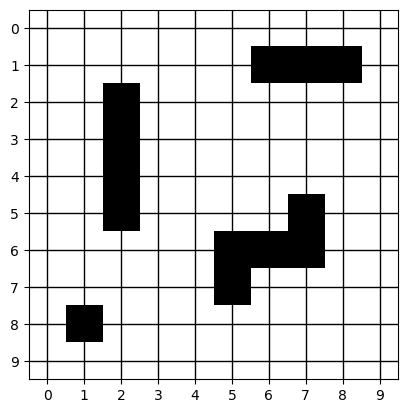

In [2]:
class Map2D:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def set_obstacle(self, x, y):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = 1
        else:
            raise ValueError("Coordinates out of bounds")

    def display(self):
        plt.imshow(self.grid, cmap='binary', interpolation='nearest')
        plt.xticks(np.arange(0, self.width, 1))
        plt.yticks(np.arange(0, self.height, 1))
        plt.grid(color='k', linewidth=1)
        plt.show()


# Exemple d'utilisation :
map_grid = Map2D(10, 10)

# Définir des obstacles
map_grid.set_obstacle(2, 3)
map_grid.set_obstacle(2, 2)
map_grid.set_obstacle(2, 4)
map_grid.set_obstacle(2, 5)
map_grid.set_obstacle(5, 7)
map_grid.set_obstacle(6, 6)
map_grid.set_obstacle(6, 1)
map_grid.set_obstacle(5, 6)
map_grid.set_obstacle(7, 5)
map_grid.set_obstacle(7, 6)
map_grid.set_obstacle(8, 1)
map_grid.set_obstacle(7, 1)
map_grid.set_obstacle(1, 8)

# Afficher la carte
map_grid.display()

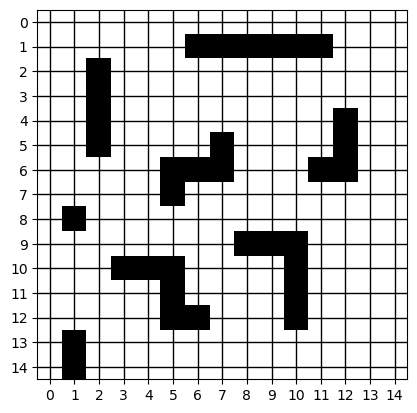

In [3]:
class Map2D:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def set_obstacle(self, x, y):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = 1
        else:
            raise ValueError("Coordinates out of bounds")

    def display(self):
        plt.imshow(self.grid, cmap='binary', interpolation='nearest')
        plt.xticks(np.arange(0, self.width, 1))
        plt.yticks(np.arange(0, self.height, 1))
        plt.grid(color='k', linewidth=1)
        plt.show()
#Exemple d'utilisation :
map_grid = Map2D(15, 15)

#Définir des obstacles
map_grid.set_obstacle(2, 3)
map_grid.set_obstacle(2, 2)
map_grid.set_obstacle(2, 4)
map_grid.set_obstacle(2, 5)
map_grid.set_obstacle(5, 7)
map_grid.set_obstacle(6, 6)
map_grid.set_obstacle(6, 1)
map_grid.set_obstacle(9, 1)
map_grid.set_obstacle(10, 1)
map_grid.set_obstacle(11, 1)
map_grid.set_obstacle(3, 10)
map_grid.set_obstacle(4, 10)
map_grid.set_obstacle(5, 10)
map_grid.set_obstacle(5, 11)
map_grid.set_obstacle(5, 12)
map_grid.set_obstacle(6, 12)
map_grid.set_obstacle(1, 14)
map_grid.set_obstacle(1, 13)
map_grid.set_obstacle(8, 9)
map_grid.set_obstacle(9, 9)
map_grid.set_obstacle(10, 9)
map_grid.set_obstacle(10, 10)
map_grid.set_obstacle(10, 11)
map_grid.set_obstacle(10, 12)
map_grid.set_obstacle(11, 6)
map_grid.set_obstacle(12, 6)
map_grid.set_obstacle(12, 5)
map_grid.set_obstacle(12, 4)
map_grid.set_obstacle(5, 6)
map_grid.set_obstacle(7, 5)
map_grid.set_obstacle(7, 6)
map_grid.set_obstacle(8, 1)
map_grid.set_obstacle(7, 1)
map_grid.set_obstacle(1, 8)

#Afficher la carte
map_grid.display()

## MAP 3D à partir d'images


Ce programme

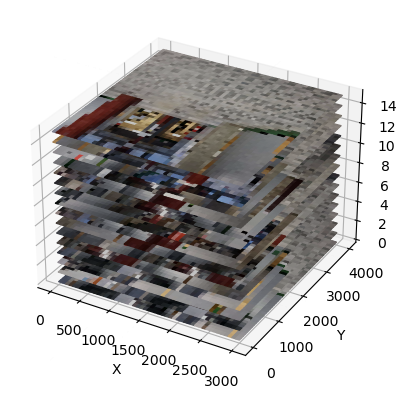

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import numpy as np

def create_3d_map(image_paths, spacing=1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i, image_path in enumerate(image_paths):
        image = Image.open(image_path)
        
        # Convertir l'image en mode RGB
        image = image.convert('RGB')
        
        image_array = np.array(image)
        
        # Normaliser les valeurs de couleur pour qu'elles soient dans la plage [0, 1]
        image_array = image_array.astype(float) / 255.0

        height, width, _ = image_array.shape

        x = np.arange(width)
        y = np.arange(height)
        X, Y = np.meshgrid(x, y)
        Z = np.ones_like(X) * i * spacing

        ax.plot_surface(X, Y, Z, facecolors=image_array)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Exemple d'utilisation :
image_paths = ["D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir2.jpg", 
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir1.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir3.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir4.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir5.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir6.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir7.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir8.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir9.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir10.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir11.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir12.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir13.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir14.jpg", 
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir15.jpg"]  # Remplacez par vos propres chemins d'image
create_3d_map(image_paths)


C:\Users\33606\AppData\Local\Temp\ipykernel_38640\3792596665.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(target_size, Image.ANTIALIAS)


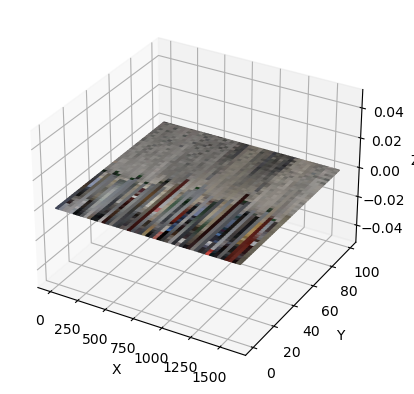

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import numpy as np

def load_and_resize_image(image_path, target_size=(100, 100)):
    image = Image.open(image_path)
    image = image.resize(target_size, Image.ANTIALIAS)
    return image

def merge_images(image_paths):
    images = [load_and_resize_image(image_path) for image_path in image_paths]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    merged_image = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for image in images:
        merged_image.paste(image, (x_offset, 0))
        x_offset += image.width

    return merged_image

def create_3d_map(merged_image, spacing=1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    image_array = np.array(merged_image) / 255.0  # Convertir les valeurs de couleur en une plage de 0 à 1
    height, width, _ = image_array.shape

    x = np.arange(width)
    y = np.arange(height)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    ax.plot_surface(X, Y, Z, facecolors=image_array)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Exemple d'utilisation :
image_paths = [
  "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir2.jpg", 
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir1.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir3.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir4.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir5.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir6.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir7.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir8.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir9.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir10.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir11.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir12.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir13.jpg",
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir14.jpg", 
               "D:/Tchance/ESIREM_2023_2024/Marc_blanchon/Projet/MRob-Hospital/Photo/BasCouloir15.jpg"
]

merged_image = merge_images(image_paths)
create_3d_map(merged_image)


In [7]:
import cv2
import numpy as np

# Charger les deux images
img_left = cv2.imread('D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\Photo\BasCouloir4.jpg')
img_right = cv2.imread('D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\Photo\BasCouloir5.jpg')

# Convertir les images en niveaux de gris
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

# Calculer la disparité
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(gray_left, gray_right)

# Convertir la disparité en une carte de profondeur
depth_map = cv2.convertScaleAbs(disparity)

# Afficher la carte de profondeur
cv2.imshow('Depth Map', depth_map)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
import cv2
import numpy as np

def reconstruct_3d(image_left_path, image_right_path):
    # Charger les images
    img_left = cv2.imread(image_left_path)
    img_right = cv2.imread(image_right_path)

    # Convertir en niveaux de gris
    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

    # Calculer les points d'intérêt et descripteurs (SIFT)
    sift = cv2.SIFT_create()
    keypoints_left, descriptors_left = sift.detectAndCompute(gray_left, None)
    keypoints_right, descriptors_right = sift.detectAndCompute(gray_right, None)

    # Correspondance des descripteurs
    matcher = cv2.BFMatcher()
    matches = matcher.match(descriptors_left, descriptors_right)

    # Filtrer les correspondances
    matches = sorted(matches, key=lambda x: x.distance)

    # Sélectionner les meilleurs correspondances
    num_good_matches = int(len(matches) * 0.1)
    matches = matches[:num_good_matches]

    # Extraire les coordonnées des points correspondants
    points_left = np.float32([keypoints_left[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    points_right = np.float32([keypoints_right[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Calculer la matrice fondamentale
    F, mask = cv2.findFundamentalMat(points_left, points_right, cv2.FM_LMEDS)

    # Rectification des images
    _, H1, H2 = cv2.stereoRectifyUncalibrated(points_left, points_right, F, gray_left.shape[::-1])

    # Transformation des matrices de projection
    H1 = np.hstack((H1, np.zeros((3, 1))))
    H2 = np.hstack((H2, np.zeros((3, 1))))

    # Projection des points dans l'espace 3D
    points_3d = cv2.triangulatePoints(H1, H2, points_left, points_right)
    points_3d /= points_3d[3]

    return points_3d[:3]


# Chemin vers les images
image_left_path = 'D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\Photo\BasCouloir4.jpg'
image_right_path = 'D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\Photo\BasCouloir5.jpg'

# Reconstruction 3D
points_3d = reconstruct_3d(image_left_path, image_right_path)

# Afficher les coordonnées des points 3D
print("Coordonnées des points 3D:")
print(points_3d)


Coordonnées des points 3D:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Premier Test map 3D

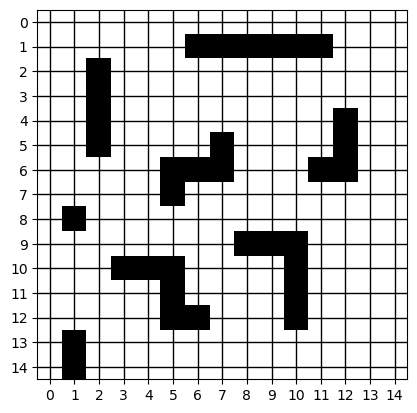

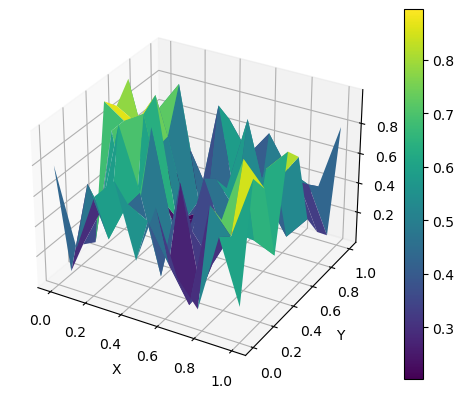

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Map2D:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def set_obstacle(self, x, y):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = 1
        else:
            raise ValueError("Coordinates out of bounds")

    def display(self):
        plt.imshow(self.grid, cmap='binary', interpolation='nearest')
        plt.xticks(np.arange(0, self.width, 1))
        plt.yticks(np.arange(0, self.height, 1))
        plt.grid(color='k', linewidth=1)
        plt.show()
        
#Exemple d'utilisation :
map_grid = Map2D(15, 15)

#Définir des obstacles
map_grid.set_obstacle(2, 3)
map_grid.set_obstacle(2, 2)
map_grid.set_obstacle(2, 4)
map_grid.set_obstacle(2, 5)
map_grid.set_obstacle(5, 7)
map_grid.set_obstacle(6, 6)
map_grid.set_obstacle(6, 1)
map_grid.set_obstacle(9, 1)
map_grid.set_obstacle(10, 1)
map_grid.set_obstacle(11, 1)
map_grid.set_obstacle(3, 10)
map_grid.set_obstacle(4, 10)
map_grid.set_obstacle(5, 10)
map_grid.set_obstacle(5, 11)
map_grid.set_obstacle(5, 12)
map_grid.set_obstacle(6, 12)
map_grid.set_obstacle(1, 14)
map_grid.set_obstacle(1, 13)
map_grid.set_obstacle(8, 9)
map_grid.set_obstacle(9, 9)
map_grid.set_obstacle(10, 9)
map_grid.set_obstacle(10, 10)
map_grid.set_obstacle(10, 11)
map_grid.set_obstacle(10, 12)
map_grid.set_obstacle(11, 6)
map_grid.set_obstacle(12, 6)
map_grid.set_obstacle(12, 5)
map_grid.set_obstacle(12, 4)
map_grid.set_obstacle(5, 6)
map_grid.set_obstacle(7, 5)
map_grid.set_obstacle(7, 6)
map_grid.set_obstacle(8, 1)
map_grid.set_obstacle(7, 1)
map_grid.set_obstacle(1, 8)

#Afficher la carte
map_grid.display()

# Créer une carte 2D de données (par exemple, des hauteurs)
data_2d = np.random.rand(10, 10)  # Exemple de données aléatoires

# Créer une grille 2D pour les positions x et y
x = np.linspace(0, 1, data_2d.shape[0])
y = np.linspace(0, 1, data_2d.shape[1])
X, Y = np.meshgrid(x, y)

# Créer une carte 3D à partir des données 2D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Créer la surface 3D
surf = ax.plot_surface(X, Y, data_2d, cmap='viridis')

# Ajouter une barre de couleur
fig.colorbar(surf)

# Ajouter des étiquettes d'axe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


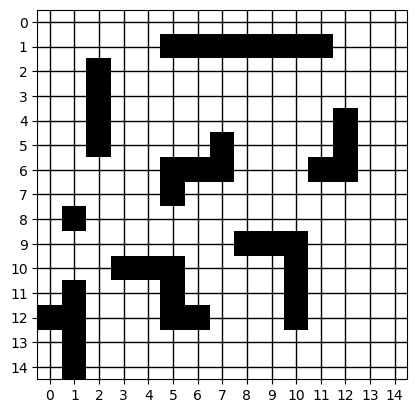

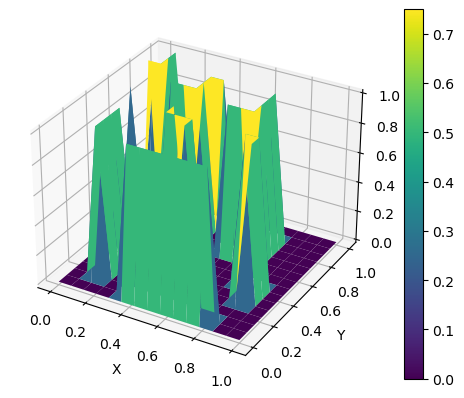

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Map2D:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def set_obstacle(self, x, y):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = 1
        else:
            raise ValueError("Coordinates out of bounds")

    def display(self):
        plt.imshow(self.grid, cmap='binary', interpolation='nearest')
        plt.xticks(np.arange(0, self.width, 1))
        plt.yticks(np.arange(0, self.height, 1))
        plt.grid(color='k', linewidth=1)
        plt.show()

# Créer une carte 2D
map_grid = Map2D(15, 15)

# Définir des obstacles
obstacles = [
    (2, 3), (2, 2), (2, 4), (2, 5), (5, 7), (6, 6), (6, 1), (9, 1), (10, 1),
    (11, 1), (3, 10), (4, 10), (5, 10), (5, 11), (5, 12), (6, 12), (1, 14),
    (1, 13), (8, 9), (9, 9), (10, 9), (10, 10), (10, 11), (10, 12), (11, 6),
    (12, 6), (12, 5), (12, 4), (5, 6), (7, 5), (7, 6), (8, 1), (7, 1), (1, 8),
    (1, 11),(1, 12), (0, 12),(5, 1)
]


for obstacle in obstacles:
    map_grid.set_obstacle(*obstacle)

#Afficher la carte
map_grid.display()

# Créer une grille 2D pour les positions x et y
x = np.linspace(0, 1, map_grid.width)
y = np.linspace(0, 1, map_grid.height)
X, Y = np.meshgrid(x, y)

# Créer une carte 3D à partir des données 2D de la carte
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Créer la surface 3D
surf = ax.plot_surface(X, Y, map_grid.grid, cmap='viridis')

# Ajouter une barre de couleur
fig.colorbar(surf)

# Ajouter des étiquettes d'axe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# Created map 2D to 3D with the robot

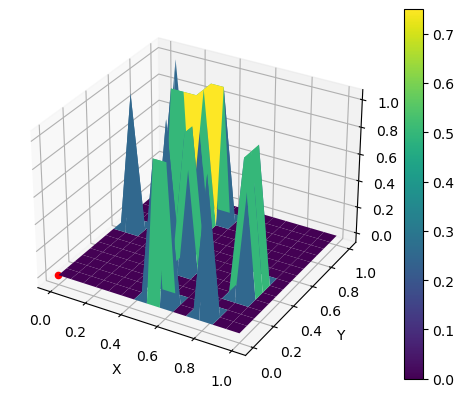

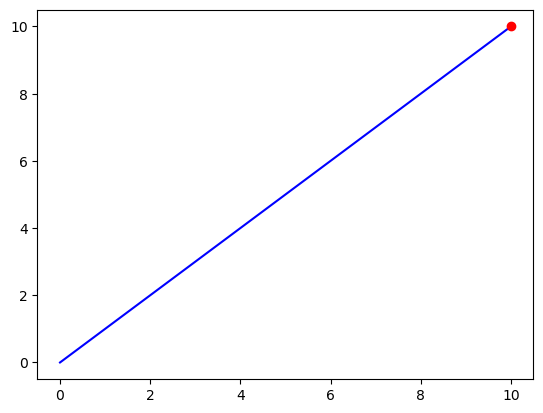

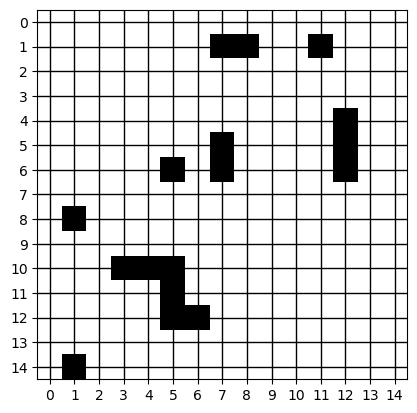

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Map2D:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width))

    def set_obstacle(self, x, y):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = 1
        else:
            raise ValueError("Coordinates out of bounds")

    def display(self):
        plt.imshow(self.grid, cmap='binary', interpolation='nearest')
        plt.xticks(np.arange(0, self.width, 1))
        plt.yticks(np.arange(0, self.height, 1))
        plt.grid(color='k', linewidth=1)
        plt.show()

class Robot:
    def __init__(self, map_grid):
        self.map = map_grid
        self.x = None
        self.y = None
        self.path = []

    def move(self, x, y):
        if 0 <= x < self.map.width and 0 <= y < self.map.height:
            if self.map.grid[y][x] != 1:  # Check if position is not an obstacle
                self.x = x
                self.y = y
                self.path.append((x, y))
            else:
                print("Obstacle encountered.")
        else:
            print("Coordinates out of bounds.")

    def plot_path_2d(self):
        path_x, path_y = zip(*self.path)
        plt.plot(path_x, path_y, 'b-')
        plt.plot(self.x, self.y, 'ro')
        plt.pause(0.1)

    def plot_position_3d(self, ax):
        ax.scatter(self.x, self.y, 0, color='red')
        plt.pause(0.1)

# Créer une carte 2D
map_grid = Map2D(15, 15)

# Définir des obstacles
obstacles = [
    #(2, 3), (2, 2), (2, 4), (2, 5), (5, 7), (6, 6), (6, 1), (9, 1), (10, 1),
    (11, 1), (3, 10), (4, 10), (5, 10), (5, 11), (5, 12), (6, 12), (1, 14),
    #(1, 13), (8, 9), (9, 9), (10, 9), (10, 10), (10, 11), (10, 12), (11, 6),
    (12, 6), (12, 5), (12, 4), (5, 6), (7, 5), (7, 6), (8, 1), (7, 1), (1, 8)
]

for obstacle in obstacles:
    map_grid.set_obstacle(*obstacle)

# Créer une grille 2D pour les positions x et y
x = np.linspace(0, 1, map_grid.width)
y = np.linspace(0, 1, map_grid.height)
X, Y = np.meshgrid(x, y)

# Créer une carte 3D à partir des données 2D de la carte
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Créer la surface 3D
surf = ax.plot_surface(X, Y, map_grid.grid, cmap='viridis')

# Ajouter une barre de couleur
fig.colorbar(surf)

# Ajouter des étiquettes d'axe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.ion()

robot = Robot(map_grid)
robot.move(0, 0)  # Position initiale du robot
robot.plot_position_3d(ax)

# Déplacer le robot jusqu'à la destination (10, 10)
destination = (10, 10)
while (robot.x, robot.y) != destination:
    dx = 1 if destination[0] > robot.x else -1
    dy = 1 if destination[1] > robot.y else -1
    robot.move(robot.x + dx, robot.y + dy)
    robot.plot_position_3d(ax)

plt.ioff()
robot.plot_path_2d()
map_grid.display()
plt.show()


## Feature matching

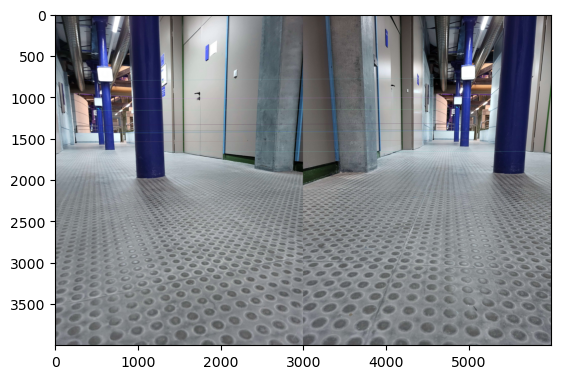

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt

# Read images with error handling
try:
    img1 = cv.imread('D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\Images\BasCouloir4.jpg')
    img2 = cv.imread('D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\Images\BasCouloir5.jpg')
except Exception as e:
    print("Error loading images:", e)
    exit()

# Check if images are loaded successfully
if img1 is None or img2 is None:
    print("Error: One or both images failed to load.")
    exit()

# Convert images to grayscale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv.ORB_create()

# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Initialize BFMatcher
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
img_matches = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.imshow(img_matches)
plt.show()

## Creation point cloud

In [6]:
import numpy as np
import cv2
import glob
import open3d as o3d

supervise_mode = True

# Your information here
name = 'Bezier and Ya'
student_id = '854652'

if supervise_mode:
    print('name:%s id:%s'%(name, student_id))

# ====================================================================================
# Camera calibration
# ====================================================================================
# Set directory path (images capturing check pattern)
# Example) calibration_dir_path = 'calibration/*.png'
calibration_dir_path = 'D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\cal\cal*.jpg'
calibration_images = glob.glob(calibration_dir_path)

# intrinsic parameters and distortion coefficient
# With these parameter, you can get undistorted image and new intrinsic parameter of them (K_undist)
K = np.array([], dtype=np.float32) # camera intrinsic parameter
dist = np.array([], dtype=np.float32) # distortion coefficient
# new matrix for undistorted intrinsic parameter
K_undist = np.array([], dtype=np.float32)

# Your code here
# Goals
# 1. Get camera intrinsic parameters from your captured images K, dist, K_undist
# 2. Try to get undistorted images by warping captured images using K_undist
# reference: https://docs.opencv.org/master/dc/dbb/tutorial_py_calibration.html

# ****************************** Your code here (M-1) ******************************
# grid count: 9 x 6
# grid size: 24mm x 24mm

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 24, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for fname in calibration_images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = img.shape[:2]

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    # If found, add object points, image points(after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (1, 1), (-1, -1), criteria)
        imgpoints.append(corners)

# Calibration
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# New undistorted intrinsic parameter
K_undist, roi = cv2.getOptimalNewCameraMatrix(K,dist,(w, h),1, (w, h))

# **********************************************************************************

if supervise_mode:
    print('1-1. Calibration: K matrix')
    print(K)
    print('1-2. Calibration: distortion coefficients')
    print(dist)
    print('1-3. Calibration: Undistorted K matrix')
    print(K_undist)
    for fname in calibration_images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        h, w = img.shape[:2]
        img_undist = cv2.undistort(gray, K, dist, None, K_undist)
        #cv2.imshow(img_undist)
        #cv2.waitKey(0)

# ====================================================================================
# load stereo images (Left and Right)
# ====================================================================================
#  set your left and right images
imgL = cv2.imread('D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\Images\BasCouloir4.jpg') #4 et 5 ensuite 13 et 12
imgR = cv2.imread('D:\Tchance\ESIREM_2023_2024\Marc_blanchon\Projet\MRob-Hospital\Images\BasCouloir5.jpg')

# convert to grayscale
grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

# Convert to undistorted images
# imgLU: undistorted image of imgL
# imgRU: undistorted image of imgR
# grayLU: undistorted image of grayL
# grayRU: undistorted image of grayR
imgLU = np.array([])
imgRU = np.array([])
grayLU = np.array([])
grayRU = np.array([])

# undistorted images
# ****************************** Your code here (M-2) ******************************
imgLU = cv2.undistort(imgL, K, dist, None, K_undist)
imgRU = cv2.undistort(imgR, K, dist, None, K_undist)
grayLU = cv2.undistort(grayL, K, dist, None, K_undist)
grayRU = cv2.undistort(grayR, K, dist, None, K_undist)
# **********************************************************************************

if supervise_mode:
    cv2.imshow('rgb undistorted', cv2.hconcat([imgLU, imgRU]))
    #cv2.imshow('gray undistorted', cv2.hconcat([grayLU, grayRU]))
    #cv2.imshow( cv2.hconcat([imgLU, imgRU]))
    #cv2_imshow(cv2.hconcat([grayLU, grayRU]))


# ====================================================================================
# stereo matching (Dense matching)
# ====================================================================================
# Goals
#  1. Get disparity map (8 bit unsigned)
#  Note. The output of disparity function (StereoBM, etc.) is 16-bit
#
# reference: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_depthmap.html
#
disp8 = np.array([], np.uint8)
# ****************************** Your code here (M-3) ******************************
# stereo block matching
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=25)
disparity = stereo.compute(grayLU, grayRU)

# Get Maximum disparity & Increase range from 1 ~ 255
max_disp = np.max(disparity)
disp8 = np.uint8(disparity / max_disp * 255)

# set max disparity and min disparity for post processing
maxdis = 235
mindis = 30

# Ignore untrusted depth
for i in range(h):
    for j in range(w):
        if (disp8[i][j] < mindis or disp8[i][j] > maxdis):
            disp8[i][j] = 0

# **********************************************************************************
if supervise_mode:
    imgLU[disp8 < 1, :] = 0
    cv2.imshow('disparity', disp8)
    cv2.imshow('Left Post-processing', imgLU)
    #cv2.imshow(disp8)
    #cv2.imshow(imgLU)
    cv2.waitKey(0)

# ====================================================================================
# Visualization
# ====================================================================================
# In advance, you should install open3D (open3d.org)
# pip install open3d

pcd = o3d.geometry.PointCloud()

#  pc_points: array(Nx3), each row composed with x, y, z in the 3D coordinate
#  pc_color: array(Nx3), each row composed with R G,B in the rage of 0~1
pc_points = np.array([], np.float32) # 픽셀의 좌표 값
pc_color = np.array([], np.float32) # 픽셀의 RGB 값 (floating point 원래는 0~255이지만 0~1로 최대 max를 1로하기! -> 255만 나누기!)

# 3D reconstruction
# Concatenate pc_points and pc_color
# ****************************** Your code here (M-4) ******************************
# Get intrinsic parameter
# Focal length
fx = K_undist[0][0]
fy = K_undist[1][1]
# Principal point
U0 = K_undist[0][2]
V0 = K_undist[1][2]

# RGB to BGR for pc_points
imgLU = cv2.cvtColor(imgLU, cv2.COLOR_RGB2BGR)

# depth = inverse of disparity
depth = 255 - disp8

for v in range(h):
    for u in range(w):
        if disp8[v][u] > 1: # ignore disparity (threshold 이하의 값을 가지는 pixel)
            # pc_points
            x = (u - U0) * depth[v][u] / fx
            y = (v - V0) * depth[v][u] / fy
            z = depth[v][u]
            pc_points = np.append(pc_points, np.array(np.float32(([x, y, z]))))
            pc_points = np.reshape(pc_points, (-1, 3))
            # pc_colors
            pc_color = np.append(pc_color, np.array(np.float32(imgLU[v][u] / 255)))
            pc_color = np.reshape(pc_color, (-1, 3))

# **********************************************************************************
#  add position and color to point cloud
pcd.points = o3d.utility.Vector3dVector(pc_points)
pcd.colors = o3d.utility.Vector3dVector(pc_color)
o3d.visualization.draw_geometries([pcd],
                                  width=1024, height=820)

print(pcd)

# Pour cette partie, il y a bcp de paramètres à changer pour avoir de bons résultats
# StereoSGBM parameters
min_disp = 0  # Minimum possible disparity value
num_disp = 16 * 5  # Range of disparity values to search
block_size = 3  # Size of the window used for matching (odd number)
P1 = 8 * 3 * block_size ** 2  # Penalty on the disparity change by plus or minus 1 between neighbor pixels
P2 = 32 * 3 * block_size ** 2  # Penalty on the disparity change by more than 1 between neighbor pixels

# Create StereoSGBM object
stereo = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=block_size,
    P1=P1,
    P2=P2,
    preFilterCap=63,  # Truncation value for the prefiltering step
    uniquenessRatio=10,  # Margin in percentage by which the minimum computed cost function value should "win" in order to avoid ambiguities
    speckleWindowSize=100,  # Maximum size of smooth disparity regions to consider them as noise
    speckleRange=32,  # Maximum disparity variation within each connected component
    disp12MaxDiff=-1,  # Maximum allowed difference (in integer pixel units) in the left-right disparity check
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY  # Stereo matching mode (SGBM 3-Way mode for improved accuracy)
)

# Compute disparity map
disparity = stereo.compute(grayLU, grayRU)

# Normalize the disparity map for display
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# **********************************************************************************

if supervise_mode:
    cv2.imshow('disparity', disparity_normalized)
    cv2.waitKey(0)
    
    



name:Bezier and Ya id:854652
1-1. Calibration: K matrix
[[3.09167782e+03 0.00000000e+00 1.52697006e+03]
 [0.00000000e+00 3.08854191e+03 1.94771840e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
1-2. Calibration: distortion coefficients
[[ 2.25573069e-02 -3.61795977e-01 -1.41330180e-03 -5.09412400e-03
   1.88149266e+00]]
1-3. Calibration: Undistorted K matrix
[[3.12033212e+03 0.00000000e+00 1.51494526e+03]
 [0.00000000e+00 3.26799688e+03 1.95943122e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: Descripteur non valide 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: Descripteur non valide 
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
PointCloud with 69635 points.
